# ロジスティック方程式について

## [始めチョロチョロ中パッパ、ぶつぶつ言ったら火を引いて、赤子泣いてもふた取るな。](https://detail.chiebukuro.yahoo.co.jp/qa/question_detail/q146989174)

## [ロジスティック方程式 - Wikipedia](https://ja.wikipedia.org/wiki/%E3%83%AD%E3%82%B8%E3%82%B9%E3%83%86%E3%82%A3%E3%83%83%E3%82%AF%E6%96%B9%E7%A8%8B%E5%BC%8F)

![](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d6/Logistic_curve%2C_r%3D1%2C_K%3D100%2C_N0%3D1.png/405px-Logistic_curve%2C_r%3D1%2C_K%3D100%2C_N0%3D1.png)

---

## [ロジスティック回帰 - Action Potentials: 閾値以下](http://d.hatena.ne.jp/kay-j/20050827/p3)

![](http://cdn-ak.f.st-hatena.com/images/fotolife/k/kay-j/20051008/20051008024024.jpg)

---

## [Logistic Regression](http://faculty.cas.usf.edu/mbrannick/regression/Logistic.html)

![](http://faculty.cas.usf.edu/mbrannick/regression/gifs/lo1.gif)

# ロジスティック回帰分析の手順

In [1]:
%matplotlib inline

In [2]:
from math import *
#import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot

In [7]:
from matplotlib.pyplot import plot

## 1. サンプルデータ
* x軸は0から100まで
* y軸は、xの値での生起確率

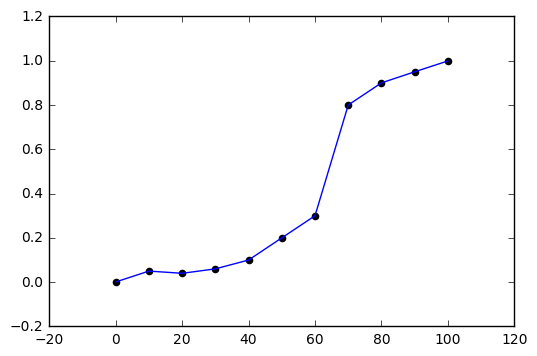

In [48]:
x = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
p = [0.001, 0.05, 0.04, 0.06, 0.1, 0.2, 0.3, 0.8, 0.9, 0.95, 0.999]
plt.scatter(x, p,  color='black')
plot(x, p)
plt.show()

### 上の散布図で、直線回帰するのは無理

---

## 2. 確率のオッズ比のグラフを描いてみる

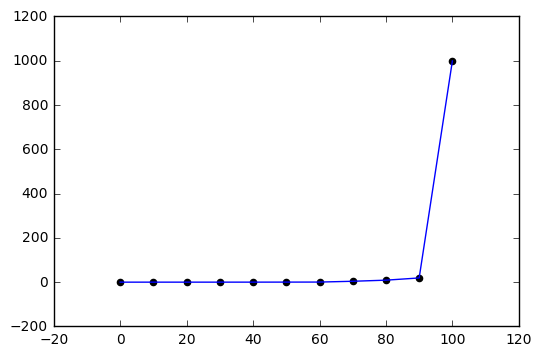

In [44]:
y = [p_/(1 - p_) for p_ in p]
plt.scatter(x, y,  color='black')
plot(x, y)

### 上の散布図で、直線回帰するのはもっと無理

---

## 3. 確率のオッズ比の自然対数(ロジット値)のグラフを描いてみる

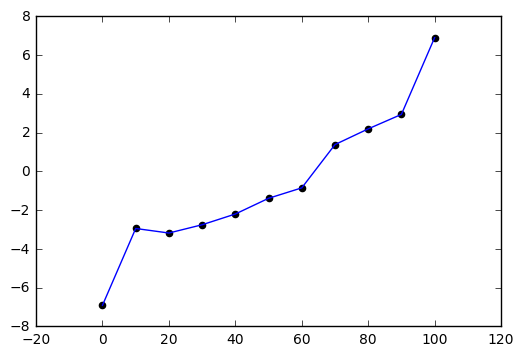

In [45]:
y1 = [log(p_/(1 - p_)) for p_ in p]
plt.scatter(x, y1,  color='black')
plot(x, y1)

### 上の散布図で、直線回帰するのはいいかも

---

## 4. ロジット値を線形回帰する

In [18]:
import pandas as pd
import numpy as np

In [19]:
dict_data = {"x": x, "y1": y1}
dict_data

{'x': [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
 'y1': [-6.906754778648554,
  -2.9444389791664403,
  -3.1780538303479453,
  -2.751535313041949,
  -2.197224577336219,
  -1.3862943611198906,
  -0.8472978603872036,
  1.3862943611198908,
  2.1972245773362196,
  2.9444389791664394,
  6.906754778648553]}

In [20]:
data_df = pd.DataFrame.from_dict(dict_data)
data_df

,x,y1
0,0,-6.906755
1,10,-2.944439
2,20,-3.178054
3,30,-2.751535
4,40,-2.197225
5,50,-1.386294
6,60,-0.847298
7,70,1.386294
8,80,2.197225
9,90,2.944439


[python - Linear Regression on Pandas DataFrame using Sci-kit Learn - Stack Overflow](https://stackoverflow.com/questions/29934083/linear-regression-on-pandas-dataframe-using-sci-kit-learn)

In [21]:
x_v = data_df.x.values
y1_v = data_df.y1.values

In [22]:
x_v

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100])

In [23]:
y1_v

array([-6.90675478, -2.94443898, -3.17805383, -2.75153531, -2.19722458,
       -1.38629436, -0.84729786,  1.38629436,  2.19722458,  2.94443898,
        6.90675478])

In [24]:
length = 11
x_w = x_v.reshape(length, 1)
y1_w = y1_v.reshape(length, 1)

In [25]:
x_w

array([[  0],
       [ 10],
       [ 20],
       [ 30],
       [ 40],
       [ 50],
       [ 60],
       [ 70],
       [ 80],
       [ 90],
       [100]])

In [26]:
y1_w

array([[-6.90675478],
       [-2.94443898],
       [-3.17805383],
       [-2.75153531],
       [-2.19722458],
       [-1.38629436],
       [-0.84729786],
       [ 1.38629436],
       [ 2.19722458],
       [ 2.94443898],
       [ 6.90675478]])

In [27]:
x

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

[ロジスティック回帰 - Wikipedia](https://ja.wikipedia.org/wiki/%E3%83%AD%E3%82%B8%E3%82%B9%E3%83%86%E3%82%A3%E3%83%83%E3%82%AF%E5%9B%9E%E5%B8%B0)
![](https://wikimedia.org/api/rest_v1/media/math/render/svg/5af95ddb20a3a38fc1d2f2774c76bfeda24f6e7f)

## 4-1. log(p/(1-p))の散布図と回帰直線
* ここで使用するのは底がeの自然対数

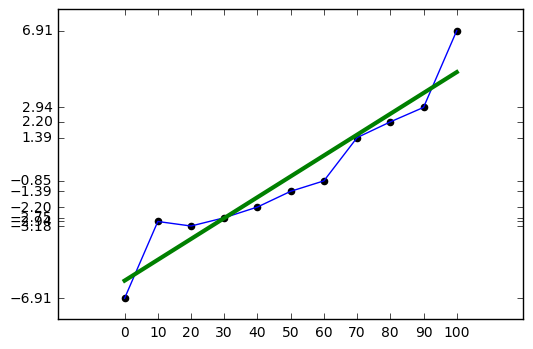

In [50]:
regr = linear_model.LinearRegression()
regr.fit(x_w, y1_w)

# plot it as in the example at http://scikit-learn.org/
plt.scatter(x_w, y1_w,  color='black')
plot(x_w, y1_w)
plt.plot(x_w, regr.predict(x_w), color='green', linewidth=3)
plt.xticks((x))
plt.yticks((y1))
plt.show()

[scikit-learn で線形回帰 (単回帰分析・重回帰分析) – Python でデータサイエンス](https://pythondatascience.plavox.info/scikit-learn/%E7%B7%9A%E5%BD%A2%E5%9B%9E%E5%B8%B0)

In [30]:
# 回帰係数
print(regr.coef_)
 
# 切片 (誤差)
print(regr.intercept_)
 
# 決定係数
print(regr.score(x_w, y1_w))

[[ 0.10761316]]
[-5.99673886]
0.906930582301


## 4-2. 回帰式
y1_hat = 0.10761316 * x + (-5.99673886)

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/1d49cd3a403d6caa6584b78b931818be1a5dd8da)

## 5. ロジット値の線形回帰式を変形して、元のグラフ上にロジスティック曲線を描く

In [33]:
x

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [36]:
p_hat = [1 / (1 + exp(-(0.10761316 * x_ + (-5.99673886)))) for x_ in x]
p_hat

[0.0024806798536476373,
 0.007241872437292948,
 0.02094935201052232,
 0.05905896855373677,
 0.15548510165131071,
 0.35067332255975747,
 0.613026213008678,
 0.822909064305991,
 0.9316498914600757,
 0.9755994288239356,
 0.9915455934452279]

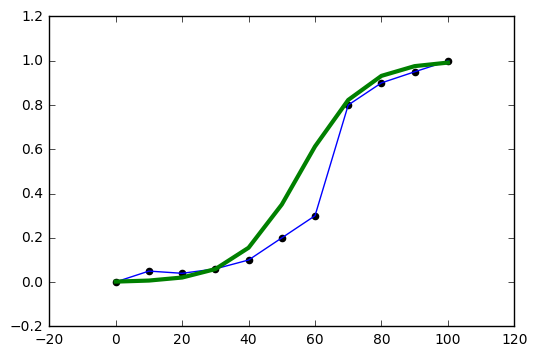

In [39]:
x = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
p = [0.001, 0.05, 0.04, 0.06, 0.1, 0.2, 0.3, 0.8, 0.9, 0.95, 0.999]
plot(x, p)

plt.scatter(x, p,  color='black')
plt.plot(x, p_hat, color='green', linewidth=3)
#plt.xticks((x))
#plt.yticks((y1))
plt.show()



### 直線で回帰するよりはいいでしょう

# 振り返り
## [Specifying Appropriate Nonlinear Functions: The Probit and Logit Models](http://www.dummies.com/education/economics/econometrics/specifying-appropriate-nonlinear-functions-the-probit-and-logit-models/)

![](http://d2r5da613aq50s.cloudfront.net/wp-content/uploads/415059.image0.jpg)

* LPM: 線形確率モデル